In [53]:
%matplotlib inline

In [54]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import matplotlib.image as mpimg

from config import gkey

In [55]:
target_coordinates = "37.567590, -77.472894"
target_radius = 1000
target_type = "restaurant"


params = {
    "location": target_coordinates,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

response = requests.get(base_url, params=params)


In [56]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [57]:

places_data = response.json()

print(json.dumps(places_data, indent=4, sort_keys=True))

{
    "html_attributions": [],
    "next_page_token": "CrQCIQEAAPH0eCer1iiKf4x6Ws9hmbI3576mmT4fDa-vMH_-ZC5bJ-Mdcdx19WvPb7zCuRLS2DGWOL1UbRU5dwtE3Yi6ojZ07KRyktrjDw0R7eFbK7tEiKCoacK0KXjA9WW-bzdhQ7TeEsA6uiWaBHtDiwagCGx0T_z3pwFdqplPix4zNExXRYdQ2PEiR6LSlAU_drvFpoejOfjbwEuWQGw-uh4Ui2ZzpudUoIH9lWAkBYlSMee8QS9vzH6i_MG0PiiKRGXo3FnY33zfjyDLyGgWlutm0VaOeXBFqg_gRUs2JwASEYE6rPWpEXcE-VcjzpS8IHK-bZVs-64lTa8wCLvBc4o4AHZt7RTMaCn5RZH84PcHOKKLZHp_EjISpGvLtpByrydHVEXS1KlcTSz7WourZBWepdcSEFtl23Vc8oCHU7M01XBf9-AaFO71jEzpvisvrBopeAKBYXZcHfRc",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 37.565312,
                    "lng": -77.46843899999999
                },
                "viewport": {
                    "northeast": {
                        "lat": 37.56668888029149,
                        "lng": -77.4671687197085
                    },
                    "southwest": {
                        "lat": 37.56399091970849,
                

In [58]:
name = []
address = []
types = []
price_levels = []
ratings = []



done = False

while not done:    
    response = requests.get(base_url, params=params)
    places_data = response.json()
        
    results = len(places_data["results"])
    
    for result in range(results):
        name.append(places_data["results"][result]["name"])
        address.append(places_data["results"][result]["vicinity"])
        price_levels.append(places_data["results"][result].get("price_level"))
        ratings.append(places_data["results"][result].get("rating"))
        types.append(places_data["results"][result]["types"][0])
        print(result)
    
    try:
        params["pagetoken"] = places_data["next_page_token"]
        
    except:
        done = True
        print("Will not break. Will not break...It broke.")
    
    time.sleep(2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
Will not break. Will not break...It broke.


In [59]:
places_dict = {
    "Business Name": name,
    "Address": address,
    "Type": types,
    "Price Level": price_levels,
    "Rating": ratings   
}

places_df = pd.DataFrame(places_dict)


places_df.head()


,Business Name,Address,Type,Price Level,Rating
0,Buz and Ned’s - Boulevard,"1119 North Arthur Ashe Boulevard, Richmond",restaurant,2.0,4.4
1,The Dairy Bar Restaurant,"1602 Roseneath Road, Richmond",restaurant,1.0,4.5
2,GLI Food Services,"2910 North Arthur Ashe Boulevard, Richmond",meal_takeaway,NaN,2.6
3,Sheppard Street Tavern,"2922 Park Avenue, Richmond",bar,2.0,4.0
4,Subway,"2801 West Broad Street, Richmond",restaurant,1.0,4.1


In [64]:
top_sorted_places = places_df.sort_values(by="Rating", ascending=False, na_position="last")

top_10 = top_sorted_places.head(10)

low_sorted_places = places_df.sort_values(by="Rating", ascending=True, na_position="last")

bottom_10 = low_sorted_places.head(10)

bottom_10.head(10)

,Business Name,Address,Type,Price Level,Rating
2,GLI Food Services,"2910 North Arthur Ashe Boulevard, Richmond",meal_takeaway,NaN,2.6
20,McDonald's,"2700 West Broad Street, Richmond",cafe,1.0,3.1
13,Hardee's,"921 Myers Street, Richmond",restaurant,1.0,3.1
31,Chanello's Pizza - Broad and Blvd,"2803 West Broad Street, Richmond",meal_delivery,1.0,3.4
32,China Panda,"616 North Sheppard Street, Richmond",meal_takeaway,1.0,3.6
24,The Urban Farmhouse Market & Cafe (Scott's Add...,"3015 Norfolk Street, Richmond",cafe,2.0,3.8
15,Buddy's Place,"600 North Sheppard Street, Richmond",bar,1.0,3.9
25,MOSAIC,"3001 Cutshaw Avenue, Richmond",restaurant,NaN,4.0
3,Sheppard Street Tavern,"2922 Park Avenue, Richmond",bar,2.0,4.0
45,The Addition RVA,"2930-C West Broad Street, Richmond",restaurant,NaN,4.0


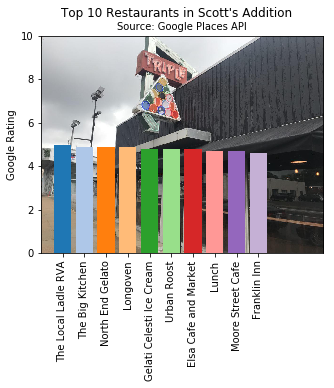

In [83]:
img = mpimg.imread("..//Scotts-Addition-RVA-Analysis//images//bg_image.jpg")

fig, ax = plt.subplots()
ax.imshow(img, extent=[-1, 12, 0, 10])
x = np.arange(10)
ax.bar(x, top_10["Rating"], color=tableau20)

plt.xticks(x, top_10["Business Name"], rotation="vertical")
plt.suptitle("Top 10 Restaurants in Scott's Addition")
plt.ylabel("Google Rating")

plt.title("Source: Google Places API", fontsize=10) 

plt.savefig("..\\Scotts-Addition-RVA-Analysis\\plots\\top_10_restaurants.jpeg")

plt.show()

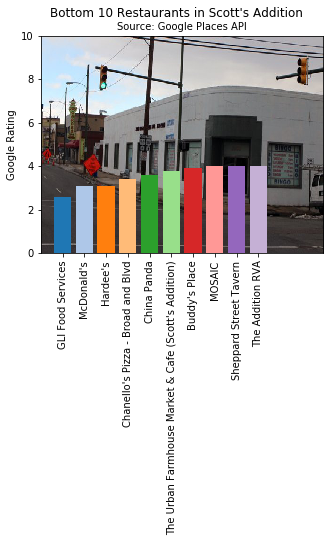

In [84]:
img = mpimg.imread("..//Scotts-Addition-RVA-Analysis//images//bingohall.jpg")

fig, ax = plt.subplots()
ax.imshow(img, extent=[-1, 12, 0, 10])
x = np.arange(10)
ax.bar(x, bottom_10["Rating"], color=tableau20)

plt.xticks(x, bottom_10["Business Name"], rotation="vertical")
plt.suptitle("Bottom 10 Restaurants in Scott's Addition")
plt.ylabel("Google Rating")

plt.title("Source: Google Places API", fontsize=10) 

plt.savefig("..\\Scotts-Addition-RVA-Analysis\\plots\\bottom_10_restaurants.jpeg")

plt.show()